In [1]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

In [2]:
import warnings
warnings.filterwarnings("ignore")

import pandas as pd
import numpy as np
import datetime as dt
import datetime, pytz
import seaborn as sns
import plotly.graph_objects as go
import matplotlib.pyplot as plt
from matplotlib import pyplot
import yfinance
import investpy
from stockstats import StockDataFrame

import matplotlib.dates as mpl_dates
from mpl_finance import candlestick_ohlc
from scipy.stats import skew, norm
from scipy.signal import argrelextrema
import copy
from sklearn.cluster import KMeans 
import time
from sklearn.cluster import MiniBatchKMeans
from sklearn.model_selection import train_test_split

pd.set_option("display.max_rows",2000)
pd.set_option("display.max_columns",50)

D:\ProgramFiles\lib\site-packages\mpl_finance.py:22: DeprecationWarning: 



    Please use `mplfinance` instead (no hyphen, no underscore).

    To install: `pip install --upgrade mplfinance` 

   For more information, see: https://pypi.org/project/mplfinance/


  category=DeprecationWarning)


In [3]:
df = pd.read_csv("predictive_maintenance.csv") 

In [4]:
df

UDI Product ID Type  Air temperature [K]  Process temperature [K]  \
0         1     M14860    M                298.1                    308.6   
1         2     L47181    L                298.2                    308.7   
2         3     L47182    L                298.1                    308.5   
3         4     L47183    L                298.2                    308.6   
4         5     L47184    L                298.2                    308.7   
...     ...        ...  ...                  ...                      ...   
9995   9996     M24855    M                298.8                    308.4   
9996   9997     H39410    H                298.9                    308.4   
9997   9998     M24857    M                299.0                    308.6   
9998   9999     H39412    H                299.0                    308.7   
9999  10000     M24859    M                299.0                    308.7   

      Rotational speed [rpm]  Torque [Nm]  Tool wear [min]  Target  \
0                       1551         42.8                0       0   
1                       1408         46.3                3       0   
2                       1498         49.4                5       0   
3                       1433         39.5                7       0   
4                       1408         40.0                9       0   
...                      ...          ...              ...     ...   
9995                    1604         29.5               14       0   
9996                    1632         31.8               17       0   
9997                    1645         33.4               22       0   
9998                    1408         48.5               25       0   
9999                    1500         40.2               30       0   

     Failure Type  
0      No Failure  
1      No Failure  
2      No Failure  
3      No Failure  
4      No Failure  
...           ...  
9995   No Failure  
9996   No Failure  
9997   No Failure  
9998   No Failure  
9999   No Failure  

[10000 rows x 10 columns]

In [5]:
#df.drop(["UDI"],axis=1,inplace=True)
#df.drop(["Product ID"],axis=1,inplace=True)

In [6]:
#df.drop(["Target"],axis=1,inplace=True)
#df.drop(["Failure Type"],axis=1,inplace=True)

In [7]:
df = df.drop(["UDI",'Product ID'],axis=1)
df['nf'] = df['Tool wear [min]'] * df['Torque [Nm]']

<AxesSubplot:xlabel='Target', ylabel='count'>

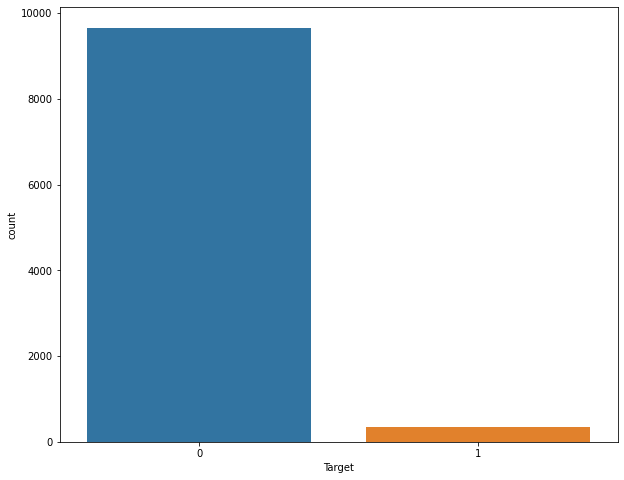

In [8]:
plt.figure(figsize=(10,8))
sns.countplot(data=df,x="Target")

<AxesSubplot:xlabel='Failure Type', ylabel='count'>

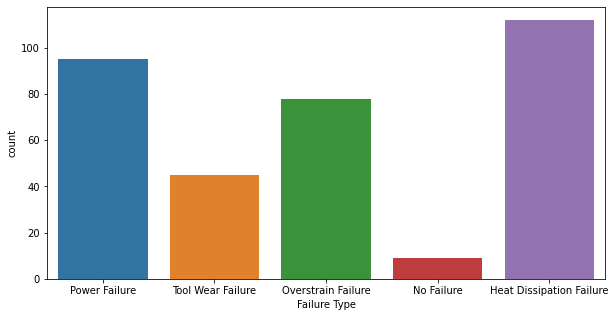

In [9]:
plt.figure(figsize=(10,5))
sns.countplot(data=df[df['Target']==1],x="Failure Type")


In [10]:
(df[df.Target == 1])

Type  Air temperature [K]  Process temperature [K]  \
50      L                298.9                    309.1   
69      L                298.9                    309.0   
77      L                298.8                    308.9   
160     L                298.4                    308.2   
161     L                298.3                    308.1   
168     L                298.4                    308.3   
194     M                298.2                    308.5   
207     M                298.4                    308.7   
242     L                298.0                    308.2   
248     L                298.0                    308.3   
249     L                298.0                    308.3   
259     M                298.1                    308.2   
327     L                297.7                    308.5   
380     L                297.5                    308.3   
442     L                297.4                    308.5   
463     L                297.4                    308.7   
586     L                297.6                    309.6   
603     L                297.9                    309.8   
746     L                296.8                    308.1   
847     L                296.4                    307.4   
880     M                295.8                    306.3   
903     L                295.7                    306.2   
926     L                295.6                    306.1   
1016    M                296.3                    307.2   
1085    L                297.0                    307.8   
1087    H                296.9                    307.8   
1095    L                296.9                    307.5   
1123    H                296.6                    307.7   
1124    M                296.7                    307.8   
1144    L                297.0                    307.9   
1161    L                297.0                    307.8   
1162    L                296.9                    307.8   
1167    L                297.0                    308.1   
1284    L                298.4                    309.5   
1324    M                298.8                    310.1   
1334    L                299.0                    310.4   
1335    L                299.0                    310.4   
1391    L                298.9                    310.2   
1419    L                298.7                    309.8   
1437    H                298.8                    309.9   
1492    M                298.0                    308.7   
1496    L                298.0                    308.7   
1509    L                298.0                    308.5   
1583    L                298.2                    308.4   
1595    L                298.0                    308.2   
1682    H                297.9                    307.4   
1763    L                298.2                    307.6   
1784    L                298.3                    308.0   
1789    L                298.2                    307.9   
1808    L                298.1                    307.7   
1833    L                297.8                    307.3   
1996    M                298.4                    308.0   
2015    L                298.5                    308.2   
2075    L                299.5                    309.4   
2125    L                299.3                    308.9   
2166    M                299.6                    309.2   
2233    L                299.5                    308.7   
2244    M                299.3                    308.4   
2299    L                299.4                    308.7   
2331    L                299.3                    308.6   
2332    L                299.2                    308.5   
2426    M                298.9                    308.2   
2444    L                299.2                    308.6   
2494    L                299.1                    308.8   
2502    L                299.2                    309.0   
2581    L                299.2                    309.1   
2598    L                299.1                    30

In [11]:
print(df.isnull().sum())

Type                       0
Air temperature [K]        0
Process temperature [K]    0
Rotational speed [rpm]     0
Torque [Nm]                0
Tool wear [min]            0
Target                     0
Failure Type               0
nf                         0
dtype: int64


In [12]:
len(df[df.Target == 1])

339

In [13]:
df.groupby(['Target','Failure Type']).count().drop(['Process temperature [K]',
                                                      'Rotational speed [rpm]',
                                                     'Torque [Nm]',
                                                     'Tool wear [min]',
                                                      'Air temperature [K]'],axis=1).rename(columns = {'Type':'count'})


count    nf
Target Failure Type                         
0      No Failure                 9643  9643
       Random Failures              18    18
1      Heat Dissipation Failure    112   112
       No Failure                    9     9
       Overstrain Failure           78    78
       Power Failure                95    95
       Tool Wear Failure            45    45

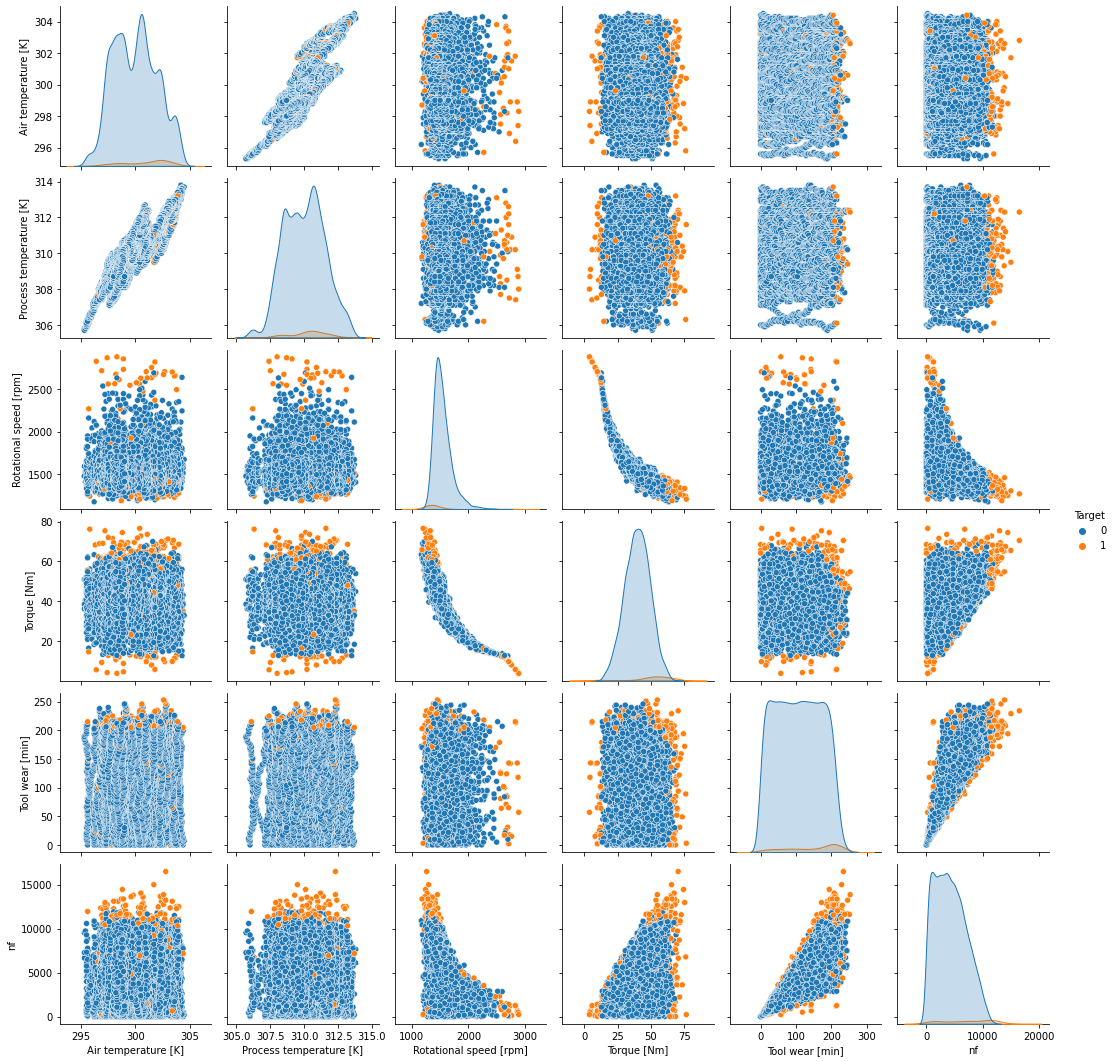

In [14]:
sns.pairplot(df,hue='Target')

<AxesSubplot:>

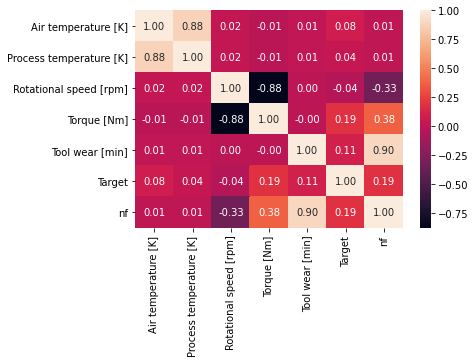

In [15]:
sns.heatmap(df.corr(), annot=True, fmt=".2f")


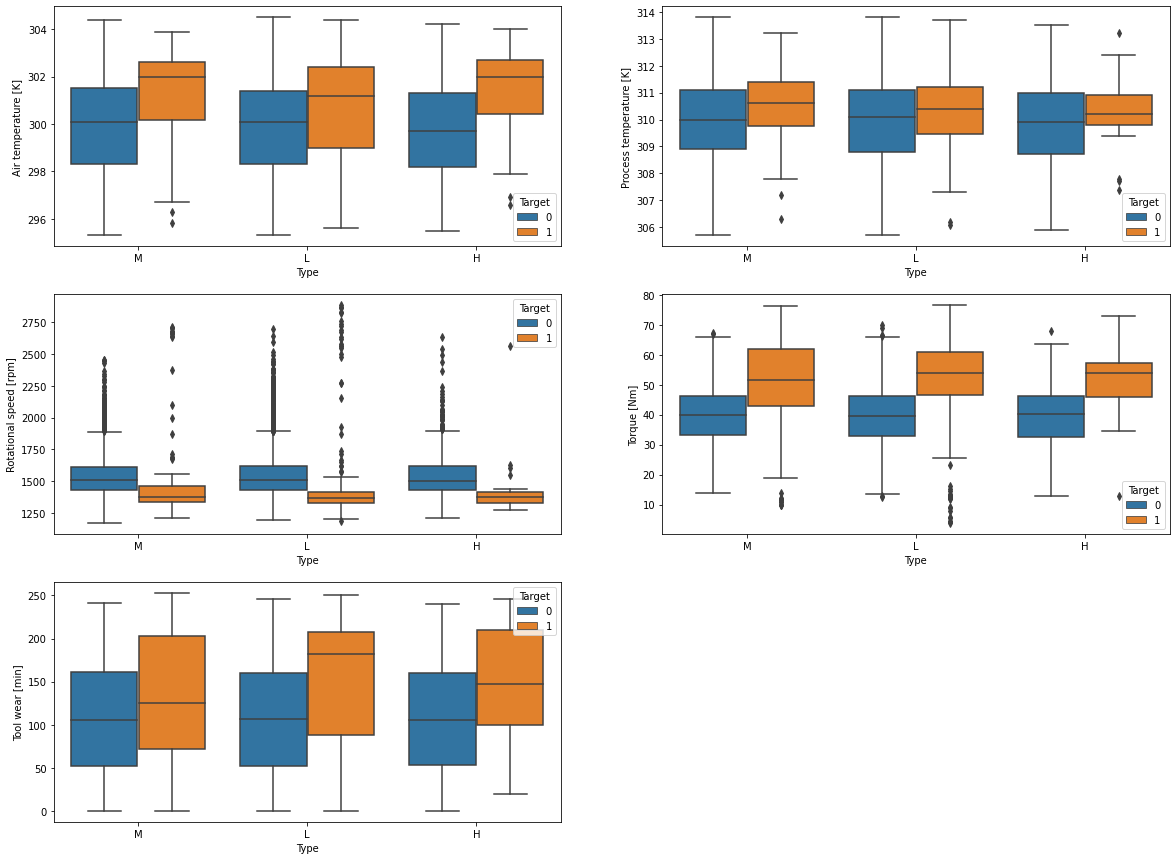

In [16]:
plt.figure(figsize = (20,15))
m=1
for i in ['Air temperature [K]', 'Process temperature [K]','Rotational speed [rpm]', 'Torque [Nm]', 'Tool wear [min]'] :
    plt.subplot(3,2,m)
    sns.boxplot(data=df,y=i,x="Type",hue="Target")
    m+=1

In [17]:
df["Target"].value_counts()

0    9661
1     339
Name: Target, dtype: int64

In [18]:
import plotly.express as px

fig = px.scatter_3d(df, x='Tool wear [min]', y='Torque [Nm]', z='Rotational speed [rpm]',
              color='Target')
fig.show()

In [19]:
df.head()

Type  Air temperature [K]  Process temperature [K]  Rotational speed [rpm]  \
0    M                298.1                    308.6                    1551   
1    L                298.2                    308.7                    1408   
2    L                298.1                    308.5                    1498   
3    L                298.2                    308.6                    1433   
4    L                298.2                    308.7                    1408   

   Torque [Nm]  Tool wear [min]  Target Failure Type     nf  
0         42.8                0       0   No Failure    0.0  
1         46.3                3       0   No Failure  138.9  
2         49.4                5       0   No Failure  247.0  
3         39.5                7       0   No Failure  276.5  
4         40.0                9       0   No Failure  360.0

In [20]:
df["Type"] = df["Type"].replace("L",0)
df["Type"] = df["Type"].replace("M",1)
df["Type"] = df["Type"].replace("H",2)

In [21]:
df_target = df.Target.copy()
df_failure_type = df["Failure Type"].copy()

In [22]:
X_train, X_test, y_train, y_test = train_test_split(df.drop(['Failure Type','Target'],axis=1),
                                                    df['Target'], test_size=0.3, random_state=42)

In [ ]:
#################### MAKALE-2 

In [ ]:
### begging classifier 

In [ ]:
from sklearn.ensemble import BaggingClassifier
bc = BaggingClassifier()
classifier.append('Bagging')
imported_as.append('bc')

In [73]:
bc.fit(X_train, y_train)

BaggingClassifier()

In [74]:
y_pred = bc.predict(X_test)

In [53]:
cm

array([[2901,   22],
       [   6,   71]], dtype=int64)

In [75]:
cm = confusion_matrix(y_pred, y_test)

In [76]:
cm

array([[  22,    3,    2,    1,    0,    0],
       [   1, 2890,    0,    6,    7,   12],
       [   0,    0,   19,    5,    0,    1],
       [   0,    5,    1,   19,    0,    0],
       [   0,    2,    0,    0,    0,    0],
       [   0,    3,    0,    0,    0,    1]], dtype=int64)

In [77]:
df["Failure Type"].unique()

array(['No Failure', 'Power Failure', 'Tool Wear Failure',
       'Overstrain Failure', 'Random Failures',
       'Heat Dissipation Failure'], dtype=object)

In [78]:
accuracy_score(y_test, y_pred)

0.9836666666666667

In [57]:
TN = cm[0,0]
TP = cm[1,1] #71
FP = cm[1,0] #6
FN = cm[0,1] #22

In [ ]:
#TP'nin costu -2
#FP'nin costu -2
#FN'nin costu -30

In [61]:
toplam_cost = (TP*2)+(FP*2)+(FN*30)

In [72]:
X_train, X_val, y_train, y_val = train_test_split(df.drop(['Failure Type','Target'],axis=1),
                                                    df['Failure Type'], test_size=0.3, random_state=42)

In [71]:
y_train

9069            No Failure
2603            No Failure
7738            No Failure
1579            No Failure
5058            No Failure
               ...        
5734    Overstrain Failure
5191            No Failure
5390            No Failure
860             No Failure
7270            No Failure
Name: Failure Type, Length: 7000, dtype: object

In [62]:
toplam_cost

814

In [68]:
df.head()

Type  Air temperature [K]  Process temperature [K]  Rotational speed [rpm]  \
0     1                298.1                    308.6                    1551   
1     0                298.2                    308.7                    1408   
2     0                298.1                    308.5                    1498   
3     0                298.2                    308.6                    1433   
4     0                298.2                    308.7                    1408   

   Torque [Nm]  Tool wear [min]  Target Failure Type     nf  
0         42.8                0       0   No Failure    0.0  
1         46.3                3       0   No Failure  138.9  
2         49.4                5       0   No Failure  247.0  
3         39.5                7       0   No Failure  276.5  
4         40.0                9       0   No Failure  360.0

In [67]:
df["Failure Type"].unique()

array(['No Failure', 'Power Failure', 'Tool Wear Failure',
       'Overstrain Failure', 'Random Failures',
       'Heat Dissipation Failure'], dtype=object)

In [56]:
cm[0,1]

22

In [52]:
cm = confusion_matrix(y_pred, y_test)

In [49]:
accuracy_score(y_test, y_pred)

0.9906666666666667

In [50]:
precision_score(y_test, y_pred)

0.922077922077922

In [63]:
f1_score(y_test, y_pred)

0.8352941176470589

In [ ]:
#################### MAKALE-2 

In [43]:
import time

from sklearn.metrics import accuracy_score,classification_report, precision_score, confusion_matrix, auc, f1_score, recall_score
classifier=[]
imported_as=[]

#LGBM
import lightgbm as lgb
lgbm = lgb.LGBMClassifier()
classifier.append('LightGBM')
imported_as.append('lgbm')

#MultiLayerPerceptron
from sklearn.neural_network import MLPClassifier
mlp=MLPClassifier()
classifier.append('Multi Layer Perceptron')
imported_as.append('mlp')

#Bagging
from sklearn.ensemble import BaggingClassifier
bc = BaggingClassifier()
classifier.append('Bagging')
imported_as.append('bc')

#GBC
from sklearn.ensemble import GradientBoostingClassifier
gbc = GradientBoostingClassifier()
classifier.append('Gradient Boosting')
imported_as.append('gbc')

#ADA
from sklearn.ensemble import AdaBoostClassifier
ada = AdaBoostClassifier()
classifier.append('Ada Boost')
imported_as.append('ada')

#XGB
import xgboost as xgb
from xgboost import XGBClassifier
xgb = XGBClassifier() 
classifier.append('XG Boost')
imported_as.append('xgb')

# Logistic Regression
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
classifier.append('Logistic Regression')
imported_as.append('lr')

#RFC
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier()
classifier.append('Random Forest')
imported_as.append('rfc')

#KNN
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=1)
classifier.append('k Nearest Neighbours')
imported_as.append('knn')

#SVM
from sklearn.svm import SVC
svc = SVC()
classifier.append('Support Vector Machine')
imported_as.append('svc')

#Grid
from sklearn.model_selection import GridSearchCV
param_grid = {'C': [0.1,1, 10, 100, 1000,2000], 'gamma': [1,0.1,0.01,0.001,0.0001], 'kernel': ['rbf']} 
grid = GridSearchCV(SVC(),param_grid,refit=True,verbose=3)
classifier.append('SVM tuning grid')
imported_as.append('grid')

#STcaking
from sklearn.ensemble import StackingClassifier
estimators=[('rf', RandomForestClassifier(n_estimators=10, random_state=42)),
            ('svr',SVC(random_state=42))]
stc = StackingClassifier(estimators=estimators, final_estimator=LogisticRegression())
classifier.append('Stacked (RFR & SVM)')
imported_as.append('stc')

classifiers = pd.DataFrame({'Classifier':classifier,'Imported as':imported_as})
print('All Models Imported\nModels stored in dataframe called classifiers')

All Models Imported
Models stored in dataframe called classifiers


In [35]:
class Modelling:
    def __init__(self, X_train, Y_train, X_test, Y_test, models):
        self.X_train = X_train
        self.X_test = X_test
        self.Y_train = Y_train
        self.Y_test = Y_test
        self.models = models
    
    def fit(self):
        model_acc = []
        model_precision = []
        model_time= []
        for i in self.models:
            start=time.time()
            if i == 'knn':
                accuracy = []
                for j in range(1,200):    
                    kn = KNeighborsClassifier(n_neighbors=j)
                    kn.fit(self.X_train,self.Y_train)
                    predK = kn.predict(self.X_test)
                    accuracy.append([accuracy_score(self.Y_test,predK),j])
                temp = accuracy[0]
                for m in accuracy:
                    if temp[0] < m[0]:
                        temp=m
                i = KNeighborsClassifier(n_neighbors=temp[1])
            i.fit(self.X_train,self.Y_train)
            model_acc.append(accuracy_score(self.Y_test,i.predict(self.X_test)))
            model_precision.append(precision_score(self.Y_test,i.predict(self.X_test)))
            stop=time.time()
            model_time.append((stop-start))
            print(i,'has been fit')
        self.models_output = pd.DataFrame({'Models':self.models,'Accuracy':model_acc,"Precision": model_precision,'Runtime (s)':model_time})
        
    def results(self):
        models=self.models_output
        models = models.sort_values(by=['Accuracy','Runtime (s)'],ascending=[False,True]).reset_index().drop('index',axis=1)
        self.best = models['Models'][0]
        models['Models']=models['Models'].astype(str).str.split("(", n = 2, expand = True)[0]
        models['Accuracy']=models['Accuracy'].round(5)*100
        self.models_output_cleaned=models
        return(models)
        
    def best_model(self,type):
        if type=='model':
            return(self.best)
        elif type=='name':
            return(self.models_output_cleaned['Models'][0])
    
    def best_model_accuracy(self):
        return(self.models_output_cleaned['Accuracy'][0])
    
    def best_model_runtime(self):
        return(round(self.models_output_cleaned['Runtime (s)'][0],3))
    
    def best_model_predict(self,X_test):
        return(self.best.predict(X_test))
    
    def best_model_clmatrix(self):
        return(classification_report(self.Y_test,self.best.predict(self.X_test)))

In [30]:
classification.results()

Models  Accuracy  Runtime (s)
0           BaggingClassifier    98.967     0.252326
1      RandomForestClassifier    98.900     0.885660
2  GradientBoostingClassifier    98.867     1.158628
3          StackingClassifier    98.633     1.365789
4          AdaBoostClassifier    97.667     0.319364
5          LogisticRegression    97.400     0.139704
6               MLPClassifier    97.067     1.673906
7        KNeighborsClassifier    96.067     0.150503

In [32]:
classification.results()

Models  Accuracy  Runtime (s)
0           BaggingClassifier    98.967     0.252326
1      RandomForestClassifier    98.900     0.885660
2  GradientBoostingClassifier    98.867     1.158628
3          StackingClassifier    98.633     1.365789
4          AdaBoostClassifier    97.667     0.319364
5          LogisticRegression    97.400     0.139704
6               MLPClassifier    97.067     1.673906
7        KNeighborsClassifier    96.067     0.150503

In [25]:
display(classifiers)

Classifier Imported as
0                 LightGBM        lgbm
1   Multi Layer Perceptron         mlp
2                  Bagging          bc
3        Gradient Boosting         gbc
4                Ada Boost         ada
5                 XG Boost         xgb
6      Logistic Regression          lr
7            Random Forest         rfc
8     k Nearest Neighbours         knn
9   Support Vector Machine         svc
10         SVM tuning grid        grid
11     Stacked (RFR & SVM)         stc

In [26]:
models_to_test = [bc,gbc,ada,rfc,mlp,lr,knn,stc]

In [27]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7000 entries, 9069 to 7270
Data columns (total 7 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Type                     7000 non-null   int64  
 1   Air temperature [K]      7000 non-null   float64
 2   Process temperature [K]  7000 non-null   float64
 3   Rotational speed [rpm]   7000 non-null   int64  
 4   Torque [Nm]              7000 non-null   float64
 5   Tool wear [min]          7000 non-null   int64  
 6   nf                       7000 non-null   float64
dtypes: float64(4), int64(3)
memory usage: 437.5 KB


In [36]:
classification = Modelling(X_train,y_train,X_test,y_test,models_to_test)
classification.fit()

BaggingClassifier() has been fit
GradientBoostingClassifier() has been fit
AdaBoostClassifier() has been fit
RandomForestClassifier() has been fit
MLPClassifier() has been fit
LogisticRegression() has been fit
KNeighborsClassifier(n_neighbors=1) has been fit
StackingClassifier(estimators=[('rf',
                                RandomForestClassifier(n_estimators=10,
                                                       random_state=42)),
                               ('svr', SVC(random_state=42))],
                   final_estimator=LogisticRegression()) has been fit


In [37]:
classification.results()

Models  Accuracy  Precision  Runtime (s)
0  GradientBoostingClassifier    98.800   0.880000     0.991322
1           BaggingClassifier    98.767   0.850000     0.232787
2      RandomForestClassifier    98.767   0.911765     0.845736
3          StackingClassifier    98.633   0.906250     1.350146
4          AdaBoostClassifier    97.667   0.694915     0.355662
5          LogisticRegression    97.400   0.692308     0.108127
6               MLPClassifier    96.933   1.000000     1.140017
7        KNeighborsClassifier    96.067   0.378641     0.217445

In [ ]:
confusion_matrix(y_true, y_pred)